## Import Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import operator
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

### Load Data

In [ ]:
# Data credits: https://www.kaggle.com/sohier/calcofi
salinity_df = pd.read_csv("https://www.dropbox.com/s/erzelsbm9ryrt0m/assignment3.csv?dl=1")


In [ ]:
salinity_df.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'salinity', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

### Statistical Summary

In [ ]:
# Select a random subset from the complete dataset
salinity_df = salinity_df.iloc[1:150000]
salinity_df.rename(columns={'Salnty':'salinity'}, inplace=True)
salinity_df.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,salinity,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
count,149997.000000,149997.000000,149997.000000,145390.000000,117589.000000,128474.000000,115076.000000,102277.000000,102277.000000,0.0,149997.000000,145390.000000,4818.000000,117589.000000,33133.000000,149997.0,22119.000000,35803.000000,48796.000000,0.0,149997.0,0.0,149997.0,56437.000000,93560.0,0.0,149997.0,0.0,149997.0,0.0,149997.0,0.0,149997.0,0.0,0.0,149997.0,0.0,0.0,149997.0,0.0,0.0,149997.0,0.0,0.0,149997.0,0.0,0.0,149997.000000,145390.000000,115238.000000,117589.000000,114194.000000,114194.000000,117847.000000,128474.000000,103713.000000,0.0,56437.000000,0.0,0.0,0.0,0.0,0.0,149997.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2604.641613,75002.000000,324.763889,9.513029,33.874512,2.879955,26.042588,48.096165,127.067193,NaN,5.054094,2.014478,8.956206,2.505898,8.978118,9.0,8.973055,8.975365,8.977949,NaN,9.0,NaN,9.0,2.027097,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,324.763889,9.513029,9.639484,33.874257,26.035362,200.205945,0.542172,2.879955,48.663676,NaN,2.027097,NaN,NaN,NaN,NaN,NaN,327.247672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1610.351641,43300.548501,370.747096,4.392575,0.508466,2.145869,1.063970,37.726776,93.779254,NaN,1.999275,0.155345,0.204658,0.499967,0.146299,0.0,0.161927,0.155012,0.146851,NaN,0.0,NaN,0.0,1.105452,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,370.747096,4.392575,4.422258,0.515594,1.063600,98.325922,0.455828,2.145869,37.834793,NaN,1.105452,NaN,NaN,NaN,NaN,NaN,374.388036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,4.000000,0.000000,1.540000,30.250000,0.000000,21.713000,0.000000,0.000000,NaN,3.000000,1.000000,8.000000,2.000000,8.000000,9.0,8.000000,8.000000,8.000000,NaN,9.0,NaN,9.0,0.020000,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.000000,1.540000,1.240000,4.570000,21.710000,38.800000,0.000000,0.000000,0.000000,NaN,0.020000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1212.000000,37503.000000,50.000000,5.940000,33.480000,0.650000,25.125000,9.500000,29.152720,NaN,3.000000,2.000000,9.000000,2.000000,9.000000,9.0,9.000000,9.000000,9.000000,NaN,9.0,NaN,9.0,0.750000,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,50.000000,5.940000,6.090000,33.480000,25.120000,117.000000,0.160000,0.650000,9.700000,NaN,0.750000,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2508.000000,75002.000000,178.000000,8.860000,33.964000,2.540000,26.317000,39.400000,112.698300,NaN,7.000000,2.000000,9.000000,3.000000,9.000000,9.0,9.000000,9.000000,9.000000,NaN,9.0,NaN,9.0,2.300000,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,178.000000,8.860000,8.950000,33.964000,26.310000,173.200000,0.420000,2.540000,40.500000,NaN,2.300000,NaN,NaN,NaN,NaN,NaN,179.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3927.000000,112501.000000,500.000000,12.470000,34.322000,5.170000,26.948000,89.900000,227.461000,NaN,7.000000,2.000000,9.000000,3.000000,9.000000,9.0,9.000000,9.000000,9.000000,NaN,9.0,NaN,9.0,3.060000,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,500.000000,12.470000,12.710000,34.322000,26.940000,284.500000,0.850000,5.170000,90.600000,NaN,3.060000,NaN,NaN,NaN,NaN,NaN,503.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5676.000000,150000.000000,3762.000000,28.540000,35.280000,8.710000,28.083000,143.400000,380.014900,NaN,7.000000,3.000000,9.00

### Data Cleaning
Cleaning up the NULL and duplicate values in the dataset:
1. Check for NULL percentages
2. Drop attributes with more than 30% data missing
3. Fill remaining NULLs with mean values
4. Re-check NULL Percentages
5. Check for duplicates

Check for NULL percentages

In [ ]:
nulls = salinity_df.isnull().sum().sort_values(ascending = False)
prcet = round(nulls/len(salinity_df)*100,2)

salinity_df_null = pd.DataFrame(columns =  ['Attr','Total','Percent'])
salinity_df_null.Attr  = nulls.index
salinity_df_null.Total = nulls.values
salinity_df_null.Percent = prcet.values
print(salinity_df_null.head(50))

                   Attr   Total  Percent
0   DIC Quality Comment  149997   100.00
1                  DIC1  149997   100.00
2                SiO3uM  149997   100.00
3                 NO2uM  149997   100.00
4               R_PHAEO  149997   100.00
5                 NO3uM  149997   100.00
6                R_CHLA  149997   100.00
7                 NH3uM  149997   100.00
8                 R_NH4  149997   100.00
9                C14As1  149997   100.00
10               C14A1p  149997   100.00
11                R_NO2  149997   100.00
12               C14As2  149997   100.00
13               C14A2p  149997   100.00
14                R_NO3  149997   100.00
15               DarkAs  149997   100.00
16               DarkAp  149997   100.00
17               MeanAs  149997   100.00
18               MeanAp  149997   100.00
19               R_SIO3  149997   100.00
20               IncTim  149997   100.00
21               Phaeop  149997   100.00
22               R_SAMP  149997   100.00
23              

Drop attributes with more than 30% data missing

In [ ]:
for i in salinity_df_null.Attr[salinity_df_null['Percent'] > 30]:
    salinity_df = salinity_df.drop([i], axis=1)

Fill remaining NULLs with mode values

In [ ]:
for i in salinity_df.columns:
    if salinity_df[i].isnull().sum() > 0:
        salinity_df[i].fillna(salinity_df[i].mode().mean(), inplace=True)

Re-check NULL Percentages

In [ ]:
nulls = salinity_df.isnull().sum().sort_values(ascending = False)
prcet = round(nulls/len(salinity_df)*100,2)

salinity_df_null = pd.DataFrame(columns =  ['Attr','Total','Percent'])
salinity_df_null.Attr  = nulls.index
salinity_df_null.Total = nulls.values
salinity_df_null.Percent = prcet.values
print(salinity_df_null.head())

      Attr  Total  Percent
0  Cst_Cnt      0      0.0
1  Btl_Cnt      0      0.0
2     R_O2      0      0.0
3  R_DYNHT      0      0.0
4    R_SVA      0      0.0


In [ ]:
salinity_df_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Attr     32 non-null     object 
 1   Total    32 non-null     int64  
 2   Percent  32 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 896.0+ bytes


Check for Duplicated values

In [ ]:
print('COUNT OF DUPLICATES:  {}'.format(salinity_df.duplicated().sum()))

COUNT OF DUPLICATES:  0


### Drop columns that cannot be Normalized 
* Cst_Cnt Auto-numbered Cast Count
* Btl_Cnt Auto-numbered Bottle count
* Sta_ID CalCOFI Line and Station
* Depth_ID [Century]-[YY][MM][ShipCode]

In [ ]:
drop_cols = ['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm',]
salinity_df_norm = salinity_df.drop(drop_cols, axis=1)  #  data for normalization
salinity_df_scale = salinity_df_norm.copy(deep=True)    #  backup data

Normalization

In [ ]:
salinity_df_scale = StandardScaler().fit_transform(salinity_df_scale)

#  create dataframe
salinity_df_norm = pd.DataFrame(salinity_df_scale, index=salinity_df_norm.index, columns=salinity_df_norm.columns)

### Correlation of features with Salinity

In [ ]:
salinity_df_norm.corr()

#  Drop columns with mode = "0.0".  No impact on correlation
print('Columns with mode:0')
for i in salinity_df_norm.columns.tolist():
    if (salinity_df_norm[i].mode()[0] == 0.0):
        print(' - ',i,salinity_df_norm[i].mode()[0])
        salinity_df_norm = salinity_df_norm.drop(i,axis=1)

#  Create correlation dataframe
print()
print('Correlation dataframe')
salinity_df_corr = pd.DataFrame(columns=['Attributes','Correlation'])
salinity_df_corr.Attributes = salinity_df_norm.corr()['salinity'].sort_values(ascending=False).index
salinity_df_corr.Correlation = salinity_df_norm.corr()['salinity'].sort_values(ascending=False).values
print(salinity_df_corr)

Columns with mode:0
 -  P_qual 0.0
 -  Chlqua 0.0
 -  Phaqua 0.0
 -  SiO3qu 0.0
 -  NO2q 0.0
 -  NO3q 0.0
 -  NH3q 0.0
 -  C14A1q 0.0
 -  C14A2q 0.0
 -  DarkAq 0.0
 -  MeanAq 0.0

Correlation dataframe
    Attributes  Correlation
0     salinity     1.000000
1   R_SALINITY     0.988342
2       STheta     0.801297
3      R_SIGMA     0.798107
4      R_Depth     0.558389
5       R_PRES     0.557894
6      R_DYNHT     0.368063
7       S_prec     0.272399
8       RecInd     0.096598
9       T_prec    -0.008384
10      T_degC    -0.512015
11      R_TEMP    -0.512015
12    R_POTEMP    -0.597880
13      O2ml_L    -0.672956
14        R_O2    -0.672956
15       R_SVA    -0.795031


### Feature selection based on correlation with 'Salinity'

In [ ]:
salinity_df_norm = salinity_df_norm[['STheta','R_SIGMA','R_Depth','R_DYNHT','S_prec','RecInd','T_degC','O2ml_L','salinity']]

x = salinity_df_norm.iloc[:,:-1]
y = salinity_df_norm['salinity']

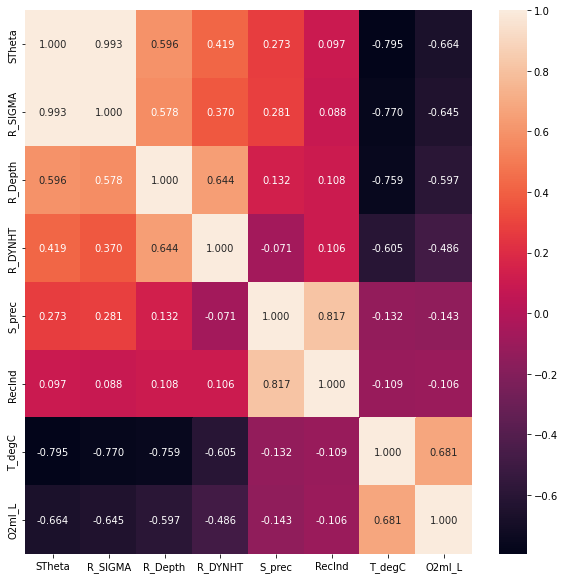

In [ ]:
# Correlation matrix
corr = x.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
            annot=True, fmt=".3f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

### Q1. Explain multicollinearity and it's effects on the model. Check for multicollinearity using Variance Inflation Factor (VIF). How would you solve the multicollinearity problem ? (4 marks) 

Answer:
Multicollinearity occurs when there is a high intercorrelation between two or more independent variables in a multiple regression model. 
Multicollinearity could be structural, where one independent variable is computed from other independent variables in the dataset or purely observational, i.e existing naturally in the data.


Effects on model
1. Multicollinearity in data makes it difficult to understand the significance of each independent variable during data analysis.
2. For effects on model performance, there is a slight increase in model performance once multicollinearity is minimized by removing one of the correlated variables, but the difference is not quiet significant in comparison with the models using data with multicollinearity problem.

In [ ]:
# Multicollinearity check using Variance Inflation

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

vif_values = pd.DataFrame()
vif_values['Attribute'] = x.columns
vif_values['VIF score'] = [VIF(x.values, i) for i in range(len(x.columns))]

In [ ]:
vif_values

,Attribute,VIF score
0,STheta,101.461592
1,R_SIGMA,92.896521
2,R_Depth,2.946140
3,R_DYNHT,2.541424
4,S_prec,4.704827
5,RecInd,4.159507
6,T_degC,4.818592
7,O2ml_L,2.117952


From the table above, STheta and R_SIGMA are highly correlated with high VIF value.
Multicollinearity will be solved by removing one of the independent variables with high correlation with the other.
i.e Dropping R_SIGMA variable.

In [ ]:
# dropping R_SIGMA feature
x_dropped = x.drop('R_SIGMA', axis=1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

### Model building

In [ ]:
def rmse(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

y_pred = linear_regressor.predict(X_test)
test_r2 = linear_regressor.score(X_test, y_test)
print('R2 Score:', test_r2)
print('RMSE:', rmse(y_test, y_pred))

R2 Score: 0.8142590911482815
RMSE: 0.4287615599272428


### Q2. Cross validate using the different number of features for Linear Regression model and check the effects on the R2 score and RMSE.  (4 marks)

*(Hint: Use sklearn.feature_selection.RFE)*

In [ ]:
from sklearn.feature_selection import RFE
pd.options.display.max_colwidth = 100

num_features_list = list(range(1, len(x.columns)+1))
features = x.columns
estimator = LinearRegression()

features_df = pd.DataFrame(columns=['Selected features', 'R2 Score', 'RMSE'])

for i in num_features_list:
  selector = RFE(estimator, n_features_to_select=i)
  selector = selector.fit(X_train, y_train)
  features_bool = selector.support_
  selected_features = [x for x, y in zip(features, features_bool) if y == True]
  r2_score = selector.score(X_test, y_test)
  mean_sq = rmse(y_test, selector.predict(X_test))
  features_df.loc[i] = selected_features, r2_score, mean_sq

features_df

,Selected features,R2 Score,RMSE
1,[STheta],0.650276,0.588335
2,"[STheta, T_degC]",0.691287,0.552763
3,"[STheta, R_Depth, T_degC]",0.761355,0.486002
4,"[STheta, R_Depth, T_degC, O2ml_L]",0.811793,0.431599
5,"[STheta, R_SIGMA, R_Depth, T_degC, O2ml_L]",0.812057,0.431295
6,"[STheta, R_SIGMA, R_Depth, R_DYNHT, T_degC, O2ml_L]",0.813155,0.430033
7,"[STheta, R_SIGMA, R_Depth, R_DYNHT, S_prec, T_degC, O2ml_L]",0.813688,0.429421
8,"[STheta, R_SIGMA, R_Depth, R_DYNHT, S_prec, RecInd, T_degC, O2ml_L]",0.814259,0.428762



###  Q3. Run the following regression algorithms using the same data, obtain the R2 scores and RMSE values:
###     i. Gradient Boosting Regressor (3 marks)


### ii. Random Forest Regressor (3 marks)

### iii. ADA Boost Regressor (3 marks)

In [ ]:
### Running algorithms using data without multicollinearity problem

In [ ]:
Xd_train, Xd_test, yd_train, yd_test = train_test_split(x_dropped, y, test_size = 0.20, random_state = 42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gboost = GradientBoostingRegressor(random_state=26)
gboost.fit(Xd_train, yd_train)
gboost_score = gboost.score(Xd_test, yd_test)
gboost_rmse = rmse(yd_test, gboost.predict(Xd_test))

print("Gradient Boosting Regressor:  R2 score: {},  RMSE: {}".format(gboost_score, gboost_rmse))

Gradient Boosting Regressor:  R2 score: 0.9561249414132703,  RMSE: 0.20838713981958631


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=26)
rf.fit(Xd_train, yd_train)
rf_score = rf.score(Xd_test, yd_test)
rf_rmse = rmse(yd_test, rf.predict(Xd_test))

print("Random Forest Regressor:  R2 score: {},  RMSE: {}".format(rf_score, rf_rmse))

Random Forest Regressor:  R2 score: 0.9910593945104935,  RMSE: 0.09406878291487425


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adab = AdaBoostRegressor(n_estimators = 100, random_state=26)
adab.fit(Xd_train, yd_train)
adab_score = adab.score(Xd_test, yd_test)
adab_rmse = rmse(yd_test, adab.predict(Xd_test))

print("ADA Boost Regressor:  R2 score: {},  RMSE: {}".format(adab_score, adab_rmse))

ADA Boost Regressor:  R2 score: 0.8226230108392614,  RMSE: 0.41899679269859297


In [ ]:
### Running algorithms using data with multicollinearity problem

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gboost = GradientBoostingRegressor(random_state=26)
gboost.fit(X_train, y_train)
gboost_score = gboost.score(X_test, y_test)
gboost_rmse = rmse(y_test, gboost.predict(X_test))

print("Gradient Boosting Regressor:  R2 score: {},  RMSE: {}".format(gboost_score, gboost_rmse))

Gradient Boosting Regressor:  R2 score: 0.9559302561396273,  RMSE: 0.20884896258812286


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=26)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
rf_rmse = rmse(y_test, rf.predict(X_test))

print("Random Forest Regressor:  R2 score: {},  RMSE: {}".format(rf_score, rf_rmse))

Random Forest Regressor:  R2 score: 0.9909962862899008,  RMSE: 0.09440019639919144


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adab = AdaBoostRegressor(n_estimators = 100, random_state=26)
adab.fit(X_train, y_train)
adab_score = adab.score(X_test, y_test)
adab_rmse = rmse(y_test, adab.predict(X_test))

print("ADA Boost Regressor:  R2 score: {},  RMSE: {}".format(adab_score, adab_rmse))

ADA Boost Regressor:  R2 score: 0.8069174776214936,  RMSE: 0.4371530784153811


### Q4. Which model performed the best and why? Give reasons. (3 marks)

The model with best performance is the RandomForestRegressor model because it uses a bagging approach to reduce overfitting of the model on the data.